## Install Turicreate library

In [1]:
import sys
!{sys.executable} -m pip install -U  turicreate

Requirement already up-to-date: turicreate in /anaconda/envs/azureml_py38/lib/python3.8/site-packages (6.4.1)


# Data Wrangling

## Load the datasets ( Transactions, Items, Users)

In [114]:
import pandas as pd
import os

DATA_DIR = "./data/final/"
OUTPUT_DIR = "./output/"
MODELS_DIR = "./models/"
purchases_filename = "events_final.csv"
products_filename = "items_final.csv"
customer_filename = "customer_final.csv"

order_column_name = "order_id"
product_column_name = "product_id"
timestamp_column_name = "order_purchase_timestamp"
category_column_name = "product_category_name_english"
reviewscore_column_name = "review_score"
customer_column_name = "customer_unique_id"
customer_city_column_name = "customer_city"

os.makedirs(OUTPUT_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)

df = pd.read_csv(DATA_DIR+purchases_filename)
df_p = pd.read_csv(DATA_DIR+products_filename)
df_c = pd.read_csv(DATA_DIR+customer_filename)

In [115]:
print(df.shape)
print(df_p.shape)
print(df_c.shape)

(110750, 6)
(32328, 10)
(99441, 4)


In [116]:
df.head(1)

,product_id,order_purchase_timestamp,review_score,customer_unique_id,order_id,period
0,4244733e06e7ecb4970a6e2683c13e61,2017-09-13 08:59:02,5,871766c5855e863f6eccc05f988b23cb,00010242fe8c5a6d1ba2dd792cb16214,Morning


In [117]:
df.tail(1)

,product_id,order_purchase_timestamp,review_score,customer_unique_id,order_id,period
110749,350688d9dc1e75ff97be326363655e01,2018-06-09 17:00:18,5,cd76a00d8e3ca5e6ab9ed9ecb6667ac4,fffe41c64501cc87c801fd61db3f6244,Evening


### See some row samples from the dataframes

In [118]:
df.iloc[0]

product_id                  4244733e06e7ecb4970a6e2683c13e61
order_purchase_timestamp                 2017-09-13 08:59:02
review_score                                               5
customer_unique_id          871766c5855e863f6eccc05f988b23cb
order_id                    00010242fe8c5a6d1ba2dd792cb16214
period                                               Morning
Name: 0, dtype: object

In [119]:
df_p.query(product_column_name + ' == ' + '"'+ str(df.iloc[0][product_column_name]) + '"')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
7950,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff


In [120]:
df_c.query(customer_column_name + ' == ' + '"'+ str(df.iloc[0][customer_column_name]) + '"')

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
65557,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ


## Transactions Unique values

In [121]:
df.nunique(axis=0)

product_id                  32171
order_purchase_timestamp    95990
review_score                    5
customer_unique_id          93397
order_id                    96517
period                          6
dtype: int64

In [122]:
df.period.unique()

array(['Morning', 'Evening', 'Night', 'Noon', 'Late Night',
       'Early Morning'], dtype=object)

## Popularity -> Transactions: Sum of unique values

In [123]:
df_popularity = df.groupby(product_column_name)[product_column_name].count().sort_values('index',ascending=False)

### This will show us how many times products have been ordered

In [124]:
df_popularity.head(5)

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    524
422879e10f46682990de24d770e7f83d    486
99a4788cb24856965c36a24e339b6058    482
389d119b48cf3043d311335e499d9c6b    391
368c6c730842d78016ad823897a372db    388
Name: product_id, dtype: int64

## Most Active Customers user_ids

In [125]:
df_c_popularity = df.groupby(customer_column_name)[customer_column_name].count().sort_values('index',ascending=False)

### This will show us how many orders customers have made

In [126]:
df_c_popularity.head(50)

customer_unique_id
c8460e4251689ba205045f3ea17884a1    24
d97b3cfb22b0d6b25ac9ed4e9c2d481b    24
4546caea018ad8c692964e3382debd19    21
c402f431464c72e27330a67f7b94d4fb    20
0f5ac8d5c31de21d2f25e24be15bbffb    18
eae0a83d752b1dd32697e0e7b4221656    15
8d50f5eadf50201ccdcedfb9e2ac8455    15
11f97da02237a49c8e783dfda6f50e8e    15
33176de67c05eeed870fd49f234387a0    15
3e43e6105506432c953e165fb2acf44c    14
dee6a650840de087ac42c4367bc9baf3    14
31e412b9fb766b6794724ed17a41dfa6    14
f7ea4eef770a388bd5b225acfc546604    14
7582a5a77fc2976628f46a13ec91b375    13
3f01021289a4c54f1c984262f4ba625b    12
4d99682572b7b5932340a0bce676c18c    12
a66315c850c3712707754c1eca7a8069    12
4644f1b187e390a08b4c66fb16c91364    12
ce9f8b9c31d83341764708396ac7e38b    12
37bc3d463e2a0024012a7fa587597a3c    12
07ff81a9676efa0286ddd3f09e7c0063    12
9eca552063680b7cd2ed0e8aea002b21    12
d3383e8df3cd44cd351aecff92e34627    12
86df00dc5fd68f4dd5d5945ca19f3ed6    12
ca77025e7201e3b30c44b472ff346268    12
2e43e0

## Check NaN values

In [127]:
print("Number of rows", df.shape[0])
df.apply(lambda x: sum(x.isnull()))

Number of rows 110750


product_id                  0
order_purchase_timestamp    0
review_score                0
customer_unique_id          0
order_id                    0
period                      0
dtype: int64

In [128]:
print("Number of rows", df_c.shape[0])
df_c.apply(lambda x: sum(x.isnull()))

Number of rows 99441


customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [129]:
print("Number of rows", df_p.shape[0])
df_p.apply(lambda x: sum(x.isnull()))

Number of rows 32328


product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 1
product_length_cm                1
product_height_cm                1
product_width_cm                 1
product_category_name_english    0
dtype: int64

In [130]:
# Remove NaNs
import numpy as np

df = df.replace({np.nan: None})
df_p = df_p.replace({np.nan: None})
df_c = df_c.replace({np.nan: None})

df = df.dropna()
df_c = df_c.dropna()
df_p = df_p.dropna()

In [131]:
df.nunique(axis=0)

product_id                  32171
order_purchase_timestamp    95990
review_score                    5
customer_unique_id          93397
order_id                    96517
period                          6
dtype: int64

## Suggested pre-processing techniques
Lastly, here are a couple of common data issues that can affect the performance of a recommender. First, if the observation data is very sparse, i.e., contains only one or two observations for a large number of users, then none of the models will perform much better than the simple baselines available via the popularity_recommender. In this case, it might help to prune out the rare users and rare items and try again. Also, re-examine the data collection and data cleaning process to see if mistakes were made. Try to get more observation data per user and per item, if you can.

Another issue often occurs when usage data is treated as ratings. Unlike explicit ratings that lie on a nice linear interval, say 0 to 5, usage data can be badly skewed. For instance, in the Million Song dataset, one user played a song more than 16,000 times. All the models would have a difficult time fitting to such a badly skewed target. The fix is to bucketize the usage data. For instance, any play count greater than 50 can be mapped to the maximum rating of 5. You can also clip the play counts to be binary, e.g., any number greater than 2 is mapped to 1, otherwise it's 0.

In [137]:
# Remove Rare customers and rare items in the transactions df

desired_users_quantile = 0.9
desired_items_quantile = 0.7

df1 = df.groupby(customer_column_name).agg(count=(customer_column_name, 'count')).sort_values('count',ascending=False)
df2 = df.groupby(product_column_name).agg(count=(product_column_name, 'count')).sort_values('count',ascending=False)

print("The",desired_users_quantile ,"quantile of number of transactions per customer is: ",df1['count'].quantile(desired_users_quantile)," transactions")
print("The number of rows before removing rare customers is:",len(df1))
df1 = df1[df1['count'] >= df1['count'].quantile(desired_users_quantile)]
print("The number of rows after removing rare customers is:",len(df1))

print("\nThe",desired_items_quantile ,"quantile of number of transactions per item is: ",df2['count'].quantile(desired_items_quantile)," transactions")
print("The number of rows before removing rare items is:",len(df2))
df2 = df2[df2['count'] >= df2['count'].quantile(desired_items_quantile)]
print("The number of rows after removing rare items is:",len(df2))


The 0.9 quantile of number of transactions per customer is:  2.0  transactions
The number of rows before removing rare customers is: 93397
The number of rows after removing rare customers is: 11612

The 0.7 quantile of number of transactions per item is:  2.0  transactions
The number of rows before removing rare items is: 32171
The number of rows after removing rare items is: 14602


In [138]:
print("\nNumber of transactions before removing rare customers",len(df))
dft = pd.merge(df, df1, on=[customer_column_name], how='inner')
print("Number of transactions after removing rare customers",len(dft))

print("\nNumber of transactions before removing rare items",len(dft))
df_final = pd.merge(dft, df2, on=[product_column_name], how='inner')
print("Number of transactions after removing rare items",len(df_final))


Number of transactions before removing rare customers 110750
Number of transactions after removing rare customers 28965

Number of transactions before removing rare items 28965
Number of transactions after removing rare items 26362


In [139]:
df_final = df_final.drop(['count_x','count_y'], axis=1)
df_final

,product_id,order_purchase_timestamp,review_score,customer_unique_id,order_id,period
0,4244733e06e7ecb4970a6e2683c13e61,2017-08-05 16:59:05,5,840f10bde3c94907105e032d9c2fec3b,c9ef97d2854afe64a3b4488bc2836af6,Evening
1,436c8d57ff8d4aa254318e9bd9b48c83,2017-08-05 16:59:05,5,840f10bde3c94907105e032d9c2fec3b,c9ef97d2854afe64a3b4488bc2836af6,Evening
2,436c8d57ff8d4aa254318e9bd9b48c83,2017-07-12 12:04:28,5,575083d1c98ec2938a00cd179a40f3d2,d829ae9ca5e0a9749f2574b62eb7ac10,Noon
3,d2f5484cbffe4ca766301b21ab9246dd,2017-09-18 16:12:04,5,eb28e67c4c0b83846050ddfb8a35d051,c105be01f21c9df6a2579f59b95cbcd9,Evening
4,d2f5484cbffe4ca766301b21ab9246dd,2017-09-09 19:50:19,1,0f187f58097c5431d5244e1fe1383884,ca5d34455321c329173e1c6c3fcff7f9,Evening
...,...,...,...,...,...,...
26357,fdcf45aa23bb8312ecc0027d6e1ef1c4,2018-04-23 19:33:08,4,57739105dd34b4fa8b3c1974c0af2b38,ffd6f465cab015b452d398ac1f5d978a,Evening
26358,fdcf45aa23bb8312ecc0027d6e1ef1c4,2018-04-23 19:33:08,4,57739105dd34b4fa8b3c1974c0af2b38,ffd6f465cab015b452d398ac1f5d978a,Evening
26359,fdcf45aa23bb8312ecc0027d6e1ef1c4,2018-04-23 19:33:08,4,57739105dd34b4fa8b3c1974c0af2b38,ffd6f465cab015b452d398ac1f5d978a,Evening
26360,e97df839917a6e93404867b1d0319bfc,2017-08-31 21:15:02,4,8fd5129c5fe27a1218056f58e8eac4e4,ffe4b41e99d39f0b837a239110260530,Night


In [140]:
print("Number of rows", df_final.shape[0])
df_final.apply(lambda x: sum(x.isnull()))

Number of rows 26362


product_id                  0
order_purchase_timestamp    0
review_score                0
customer_unique_id          0
order_id                    0
period                      0
dtype: int64

## Drop Duplicate orders to balance dataset better

In [141]:
# check if there are any duplicate order_id in the dataframe
duplicates = df_final.duplicated(subset=["order_id"])

# print the result
if duplicates.any():
    print("There are duplicate order_id in the dataset.")
else:
    print("There are no duplicate order_id in the dataset.")

There are duplicate order_id in the dataset.


In [143]:
# Since there were duplicates, let's drop those
df_final.drop_duplicates(['order_id'], keep='first', inplace=True)
df_balanced = df_final
print(df_final.shape)
print(df_balanced.shape)

(13463, 6)
(13463, 6)


In [144]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,10)

df_bal_pop = df_balanced.groupby(product_column_name).agg(count=(product_column_name, 'count')).sort_values('count',ascending=False)

pd.merge(df_bal_pop, df_p, on=[product_column_name], how='left').head(20)

,product_id,count,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,422879e10f46682990de24d770e7f83d,101,ferramentas_jardim,56,348,2,1550,30,22,30,garden_tools
1,53759a2ecddad2bb87a079a1f1519f73,96,ferramentas_jardim,58,340,2,1500,30,22,30,garden_tools
2,368c6c730842d78016ad823897a372db,96,ferramentas_jardim,57,366,2,1650,30,22,30,garden_tools
3,99a4788cb24856965c36a24e339b6058,94,cama_mesa_banho,54,245,1,1383,50,10,40,bed_bath_table
4,aca2eb7d00ea1a7b8ebd4e68314663af,90,moveis_decoracao,44,903,6,2600,50,10,30,furniture_decor
5,389d119b48cf3043d311335e499d9c6b,85,ferramentas_jardim,59,341,2,1750,37,22,40,garden_tools
6,36f60d45225e60c7da4558b070ce4b60,64,informatica_acessorios,33,300,1,207,19,11,14,computers_accessories
7,b532349fe46b38fbc7bb3914c1bdae07,59,moveis_decoracao,49,829,1,850,20,25,20,furniture_decor
8,154e7e31ebfa092203795c972e5804a6,59,beleza_saude,48,575,1,100,20,15,15,health_beauty
9,d1c427060a0f73f6b889a5c7c61f2ac4,40,informatica_acessorios,59,1893,1,6550,20,20,20,computers_accessories


In [145]:
df_bal_pop.drop(df_bal_pop.head(50).index)

,count
product_id,
e0cf79767c5b016251fe139915c59a26,14
e1da6ab77f4859eb17950e5df1c0f815,13
8ed094bfe076c568f6bb10feada3f75d,13
16679d68bdbed3fb97af806424d7f2b7,13
b5e13c9a353102f79c6206ff5cb61a50,13
...,...
2ebf6091e855569170c684ada3a284e5,1
8a4667ce8c036b0d54dd65a38298bfc0,1
8a4505505378c8f5d983f3201e9c25da,1


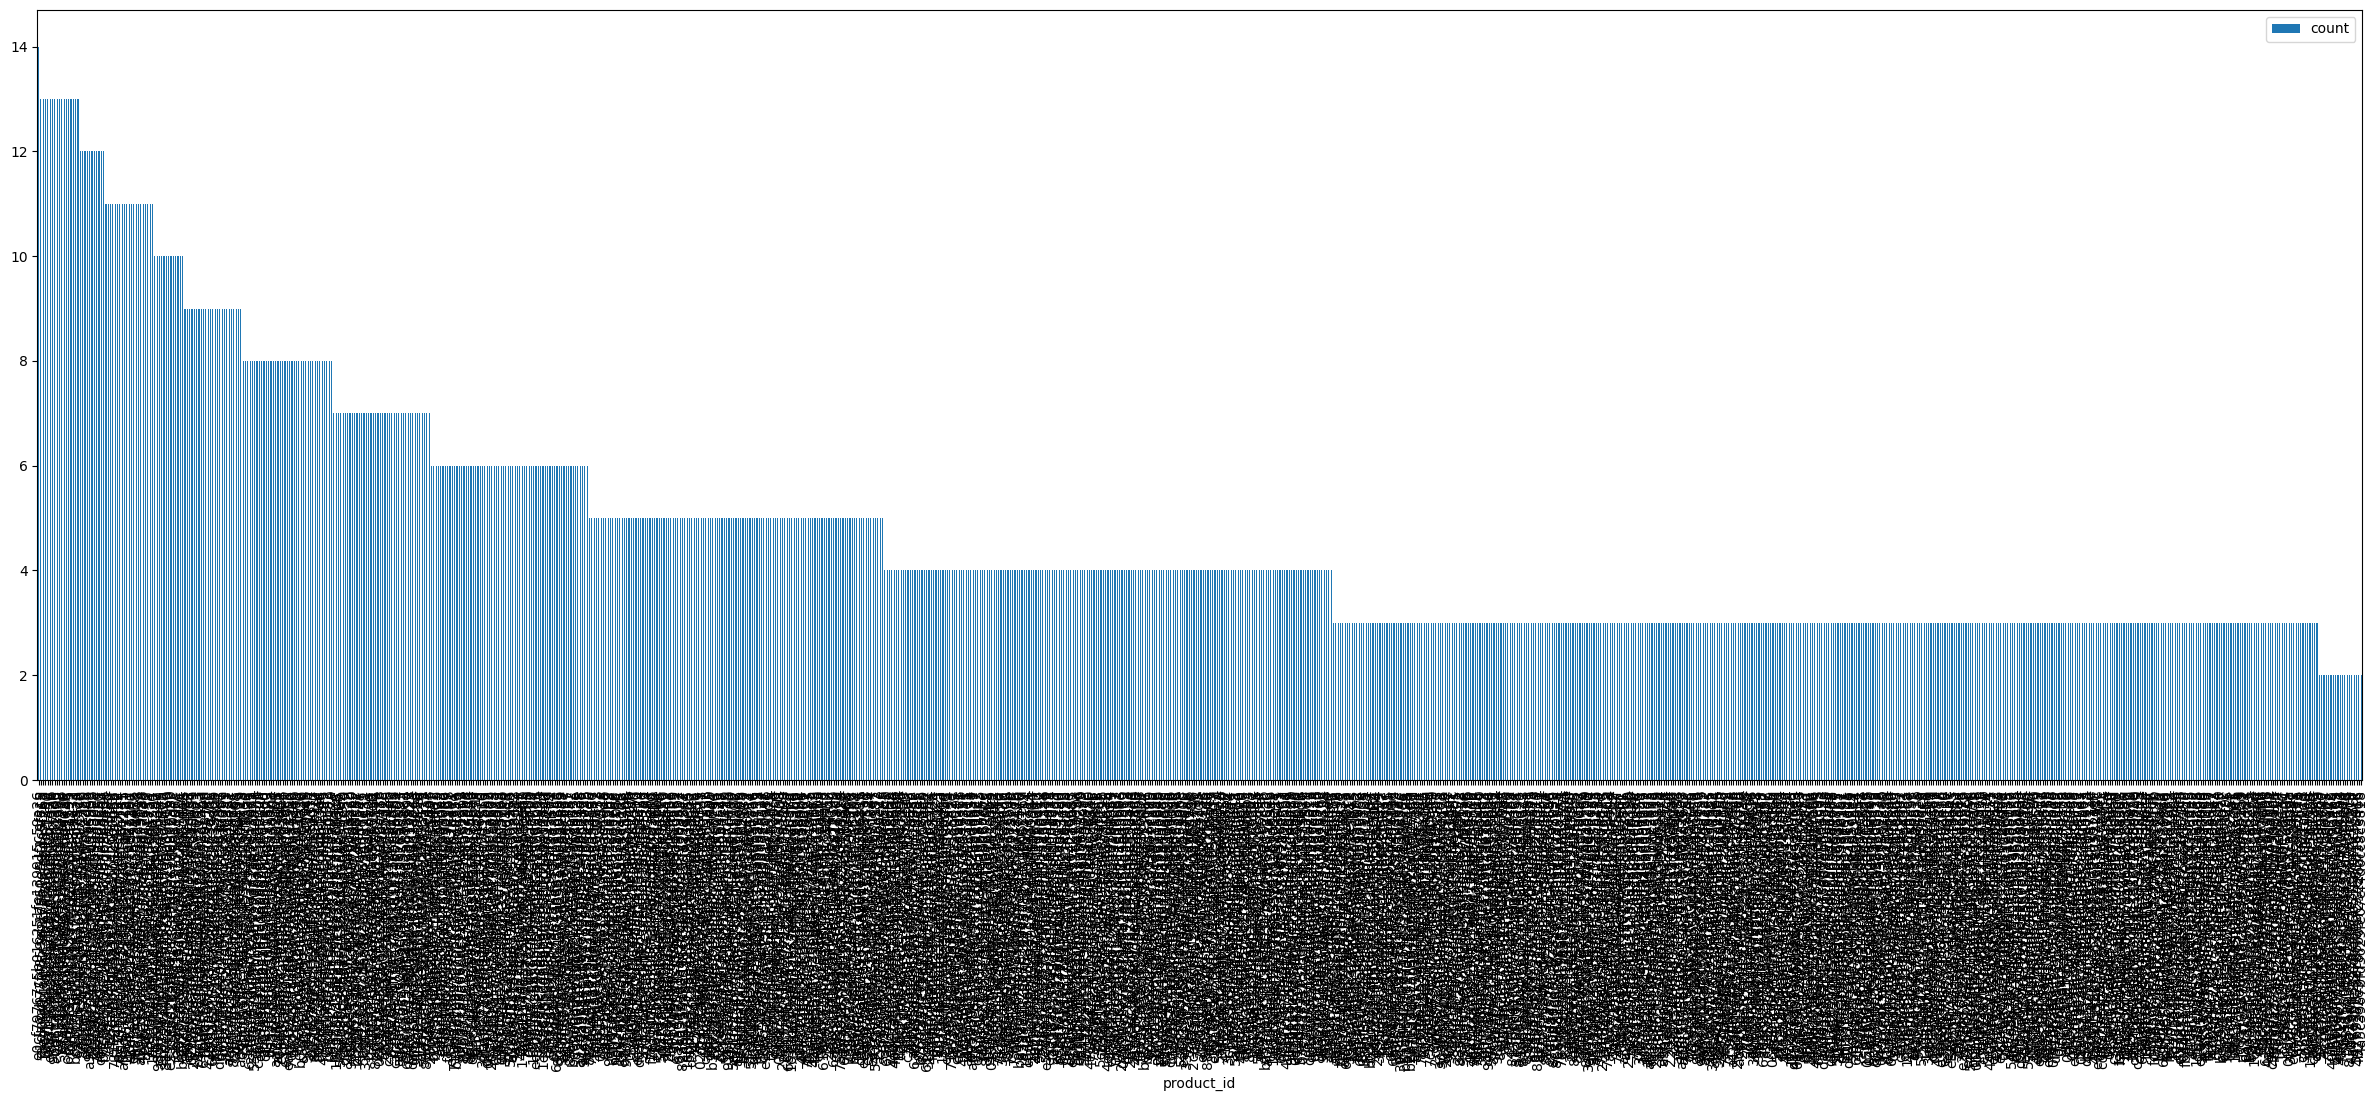

In [146]:
# Plot the distribution of top 1000 popular items that are NOT the top 50
df_bal_pop.drop(df_bal_pop.head(50).index).head(1000).plot.bar()

## Encode the target 
## Since we have the review score, we will use this as our target

In [148]:
# NOTE: dont need to encode the target because that is basically what we already have with the review score 
df_balanced['target'] = df_balanced['review_score']

In [149]:
df_balanced["target"].value_counts()

5    7010
1    2408
4    2232
3    1198
2     615
Name: target, dtype: int64

In [150]:
df_balanced.drop(columns=[reviewscore_column_name], inplace=True)

## Check datasets before modeling

In [151]:
print("Number of rows", df_balanced.shape[0])
df_balanced.apply(lambda x: sum(x.isnull()))

Number of rows 13463


product_id                  0
order_purchase_timestamp    0
customer_unique_id          0
order_id                    0
period                      0
target                      0
dtype: int64

In [162]:
# drop order_id, dates, and period
df_balanced = df_balanced.drop(["order_id","order_purchase_timestamp", "period"], axis=1)

In [164]:
df_balanced[df_balanced.isna().any(axis=1)]

,product_id,customer_unique_id,target


In [165]:
print("Number of rows", df_c.shape[0])
df_c.apply(lambda x: sum(x.isnull()))

Number of rows 99441


customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [166]:
print("Number of rows", df_p.shape[0])
df_p.apply(lambda x: sum(x.isnull()))

Number of rows 32327


product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

# Modeling

## Create the SFrames that Turicreate needs for the recommender

In [167]:
# NOTE: make sure all dates and order id is dropped from main events df!
import turicreate
from turicreate import SFrame

In [168]:
sf = SFrame(data=df_balanced)

In [169]:
sf.show()

Materializing SFrame

In [170]:
sf_p = SFrame(data=df_p)

In [171]:
sf_p

product_id,product_category_name,product_name_lenght,product_description_lenght ...,product_photos_qty
1e9e8ef04dbcff4541ed26657ea517e5 ...,perfumaria,40.0,287.0,1.0
6a2fb4dd53d2cdb88e0432f1284a004c ...,perfumaria,39.0,346.0,2.0
0d009643171aee696f4733340bc2fdd0 ...,perfumaria,52.0,150.0,1.0
b1eae565a61935e0011ee7682fef9dc9 ...,perfumaria,49.0,460.0,2.0
8da90b37f0fb171b4877c124f965b1f6 ...,perfumaria,56.0,733.0,3.0
828fe032935d7c1901682e5b6cc076c2 ...,perfumaria,48.0,1063.0,2.0
bbaef2eadf31fe3ea6702077398be06c ...,perfumaria,45.0,1003.0,2.0
cd7701670288642f7be9437dec9034c1 ...,perfumaria,48.0,606.0,2.0
dc582e9ac5036846acfeeb3093b17aa7 ...,perfumaria,50.0,749.0,1.0
1f64ec386a6be322e71596931f5d2377 ...,perfumaria,46.0,499.0,1.0


In [172]:
sf_c = SFrame(data=df_c)

In [173]:
sf_c.show()

Materializing SFrame

## Spliting Dataset in Training and Testing

In [174]:
df_c_popularity[df_c_popularity < df_c_popularity.quantile(0.80)].index

Index([], dtype='object', name='customer_unique_id')

In [175]:
df_balanced[customer_column_name]

0        840f10bde3c94907105e032d9c2fec3b
2        575083d1c98ec2938a00cd179a40f3d2
3        eb28e67c4c0b83846050ddfb8a35d051
4        0f187f58097c5431d5244e1fe1383884
5        6b27bfed0a7785feb3bb08725e057947
                       ...               
26350    0cd33e5cc45d8be1415bf478ead300f5
26353    ddb2249e0316d365ceae561c0f011bce
26355    d87ea5e1e23e42953de9a2e6aa31c80e
26357    57739105dd34b4fa8b3c1974c0af2b38
26360    8fd5129c5fe27a1218056f58e8eac4e4
Name: customer_unique_id, Length: 13463, dtype: object

In [176]:
high_rated_data = SFrame(data=df_balanced[df_balanced[customer_column_name].isin(df_c_popularity[df_c_popularity >= df_c_popularity.quantile(0.98)].index.tolist())])

low_rated_data = SFrame(data=df_balanced[df_balanced[customer_column_name].isin(df_c_popularity[df_c_popularity < df_c_popularity.quantile(0.98)].index.tolist())])
train_data_1, test_sf = turicreate.recommender.util.random_split_by_user(high_rated_data, 
                                                                     user_id=customer_column_name, 
                                                                     item_id=product_column_name)

train_sf = train_data_1.append(low_rated_data)

In [177]:
high_rated_data = SFrame(data=df_balanced[df_balanced[customer_column_name].isin(df_c_popularity[df_c_popularity >= df_c_popularity.quantile(0.98)].index.tolist())])

In [178]:
high_rated_data.head()

product_id,customer_unique_id,target
d2f5484cbffe4ca766301b21ab9246dd ...,0f187f58097c5431d5244e1fe1383884 ...,1
d2f5484cbffe4ca766301b21ab9246dd ...,06171ada9d20ee81d698c39fddf04264 ...,5
060f0122cdc8f25db4a0d7359fdae7b0 ...,31d3e4ea0bd3eded67809f54889f56a2 ...,5
060f0122cdc8f25db4a0d7359fdae7b0 ...,d65c32925d7e29eb440266a1eba9a10f ...,4
99a4788cb24856965c36a24e339b6058 ...,fe52c2abb172426dd6416cc69e6b3689 ...,1
99a4788cb24856965c36a24e339b6058 ...,fe52c2abb172426dd6416cc69e6b3689 ...,1
99a4788cb24856965c36a24e339b6058 ...,dc75b21faa83875157ade3ef98dfadc5 ...,5
99a4788cb24856965c36a24e339b6058 ...,eeea20d93b0e221411defcabab3c8949 ...,5
99a4788cb24856965c36a24e339b6058 ...,d9752ac494a2b97507fd2faa478cabd9 ...,3
99a4788cb24856965c36a24e339b6058 ...,88ecb91d6d5e47ebdc2129cd046b0935 ...,5


In [179]:
train_sf.head()

product_id,customer_unique_id,target
d2f5484cbffe4ca766301b21ab9246dd ...,0f187f58097c5431d5244e1fe1383884 ...,1
d2f5484cbffe4ca766301b21ab9246dd ...,06171ada9d20ee81d698c39fddf04264 ...,5
060f0122cdc8f25db4a0d7359fdae7b0 ...,31d3e4ea0bd3eded67809f54889f56a2 ...,5
060f0122cdc8f25db4a0d7359fdae7b0 ...,d65c32925d7e29eb440266a1eba9a10f ...,4
99a4788cb24856965c36a24e339b6058 ...,fe52c2abb172426dd6416cc69e6b3689 ...,1
99a4788cb24856965c36a24e339b6058 ...,dc75b21faa83875157ade3ef98dfadc5 ...,5
99a4788cb24856965c36a24e339b6058 ...,eeea20d93b0e221411defcabab3c8949 ...,5
99a4788cb24856965c36a24e339b6058 ...,d9752ac494a2b97507fd2faa478cabd9 ...,3
99a4788cb24856965c36a24e339b6058 ...,88ecb91d6d5e47ebdc2129cd046b0935 ...,5
99a4788cb24856965c36a24e339b6058 ...,19f8fcd23ed70e29220a6a2f13ecd911 ...,5


## Train models

### MODEL 1 - Build a Item Similarity model using only Transaction data

In [181]:
model_s = turicreate.recommender.item_similarity_recommender.create(observation_data = train_sf,
                                                                    user_id=customer_column_name, 
                                                                    item_id=product_column_name,
                                                                    target='target')

Preparing data set.

Data has 13197 observations with 11089 users and 6815 items.

Data prepared in: 0.096995s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 846us                          | 9          |

| 8.332ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 1.65s                               | 0                | 1               |

| 1.89s                               | 100              | 6815            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.90857s

### MODEL 2 - Build a Ranking Factorization model using item and user side features

In [182]:
model_r = turicreate.ranking_factorization_recommender.create(observation_data = train_sf,
                                                              user_id=customer_column_name, 
                                                              item_id=product_column_name,
                                                              target = 'target',
                                                              user_data=sf_c,
                                                              item_data=sf_p
                                                             )

Preparing data set.

Data has 13197 observations with 96096 users and 32327 items.

Data prepared in: 0.472903s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 13197 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 3.57143           | Not Viable                               |

| 1       | 0.892857          | Not Viable                               |

| 2       | 0.223214          | 0.734778                                 |

| 3       | 0.111607          | Not Viable                               |

| 4       | 0.0279018         | 2.22068                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.223214          | 0.734778                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 143us        | 4.63522           | 1.53743               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 153.773ms    | DIVERGED          | DIVERGED              | 0.223214    |

| RESET   | 315.965ms    | 4.63534           | 1.53746               |             |

| 1       | 474.301ms    | DIVERGED          | DIVERGED              | 0.111607    |

| RESET   | 640.843ms    | 4.63587           | 1.53748               |             |

| 1       | 786.869ms    | DIVERGED          | DIVERGED              | 0.0558036   |

| RESET   | 948.823ms    | 4.63514           | 1.53747               |             |

| 1       | 1.07s        | 4.48813           | 1.67294               | 0.0279018   |

| 2       | 1.19s        | 3.84347           | 1.50183               | 0.0279018   |

| 3       | 1.30s        | 3.47944           | 1.40502               | 0.0279018   |

| 4       | 1.41s        | 3.14931           | 1.30368               | 0.0279018   |

| 5       | 1.51s        | 2.85104           | 1.19891               | 0.0279018   |

| 7       | 1.72s        | 2.32043           | 1.00398               | 0.0279018   |

| 25      | 3.59s        | 1.06004           | 0.531092              | 0.0279018   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.941903

Final training RMSE: 0.430129

### MODEL 3 - Build a Factorization model using item and user side features

In [183]:
model_f = turicreate.factorization_recommender.create(observation_data = train_sf,
                                                              user_id=customer_column_name, 
                                                              item_id=product_column_name,
                                                              target = 'target',
                                                              user_data=sf_c,
                                                              item_data=sf_p
                                                             )

Preparing data set.

Data has 13197 observations with 96096 users and 32327 items.

Data prepared in: 0.453133s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 1e-08    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-10    |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 13197 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 3.57143           | Not Viable                               |

| 1       | 0.892857          | Not Viable                               |

| 2       | 0.223214          | 0.409224                                 |

| 3       | 0.111607          | 0.145523                                 |

| 4       | 0.0558036         | 0.518959                                 |

+---------+-------------------+------------------------------------------+

| Final   | 0.111607          | 0.145523                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 111us        | 2.36368           | 1.53743               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 30.449ms     | 5.52065           | 2.3496                | 0.111607    |

| 2       | 51.917ms     | 1.66386           | 1.2899                | 0.111607    |

| 3       | 77.015ms     | 1.19935           | 1.09514               | 0.111607    |

| 4       | 100.577ms    | 0.9952            | 0.997584              | 0.111607    |

| 5       | 124.473ms    | 0.860954          | 0.927861              | 0.111607    |

| 10      | 231.105ms    | 0.513397          | 0.716494              | 0.111607    |

| 50      | 1.08s        | 0.0452406         | 0.212586              | 0.111607    |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.0376553

Final training RMSE: 0.193926

## Evaluation and model comparison
When trying out different recommender models, it's critical to have a principled way of evaluating their performance. The standard approach to this is to split the observation data into two parts, a training set and a test set. The model is trained on the training set, and then evaluated on the test set -- evaluating your model on the same dataset that it was trained on gives a very bad idea of how well it will perform in practice. Once the model type and associated parameters are chosen, the model can be trained on the full dataset.

With recommender systems, we can evaluate models using two different metrics, RMSE and precision-recall. RMSE measures how well the model predicts the score of the user, while precision-recall measures how well the recommend() function recommends items that the user also chooses. For example, the best RMSE value is when the model exactly predicts the value of all the ratings in the test set. Similarly, the best precision-recall value is when the user has 5 items in the test set and recommend() recommends exactly those 5 items. While both can be important depending on the type of data and desired task, precision-recall is often more useful in evaluating how well a recommender system will perform in practice.

In [184]:
eval_list = turicreate.recommender.util.compare_models(test_sf, [model_s, model_f, model_r], 
                                                       model_names=["Similarity", "Ranking", "Factorization"], 
                                                       metric='precision_recall',   
                                                       verbose=False)

In [185]:
# Similarity model mean precision and recall
eval_list[0]['precision_recall_overall'].to_dataframe().head(10).mean()

cutoff       5.50000
precision    0.00769
recall       0.02815
dtype: float64

In [186]:
# Ranking model mean precision and recall
eval_list[1]['precision_recall_overall'].to_dataframe().head(10).mean()

cutoff       5.5
precision    0.0
recall       0.0
dtype: float64

In [187]:
# Factorization model mean precision and recall
eval_list[2]['precision_recall_overall'].to_dataframe().head(10).mean()

cutoff       5.500000
precision    0.000759
recall       0.003543
dtype: float64

In [188]:
print(model_f.observation_data_column_names)
print(model_f.user_side_data_column_names)
print(model_f.item_side_data_column_names)

['customer_unique_id', 'product_id', 'target']
['customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']
['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_category_name_english']


</br>
It looks like the Similarity model is better on the test set than the factorization model

 - Items similarity model recomended ~5% of the items found in the test set
 - Factorization and Raking model recommended 0% of the items found on the tesst set
 
This implies that the side data of users and items datasets are not helping but in fact making it worse.

The real test would be to deploy both models and do AB testing live and see how rentals perform
</br>
</br>

## Save the models to disk

In [189]:
model_s.save(MODELS_DIR + "recommendation_s.model")
model_s = turicreate.load_model(MODELS_DIR + "recommendation_s.model")

In [190]:
model_r.save(MODELS_DIR + "recommendation_r.model")
model_r = turicreate.load_model(MODELS_DIR + "recommendation_r.model")

In [191]:
model_f.save(MODELS_DIR + "recommendation_f.model")
model_f = turicreate.load_model(MODELS_DIR + "recommendation_f.model")

# Sample queries to the models
By default, recommend() excludes items seen during training, so that it would not recommend items that the user has already seen. To change this behavior, you can specify exclude_known=False

## Query the model for recommendations on specific user(s)
By default, recommend() excludes items seen during training, so that it would not recommend items that the user has already rented. To change this behavior, you can specify exclude_known=False

In [192]:
uid = 163561
pd.merge(model_s.recommend(users=[uid], k=20).to_dataframe().head(10), df_p, on=[product_column_name], how='left')

,customer_unique_id,product_id,score,rank,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,163561,154e7e31ebfa092203795c972e5804a6,0.006721,1,beleza_saude,48,575,1,100,20,15,15,health_beauty
1,163561,36f60d45225e60c7da4558b070ce4b60,0.006053,2,informatica_acessorios,33,300,1,207,19,11,14,computers_accessories
2,163561,2b4609f8948be18874494203496bc318,0.004384,3,beleza_saude,59,492,3,250,22,10,18,health_beauty
3,163561,e53e557d5a159f5aa2c5e995dfdf244b,0.003294,4,informatica_acessorios,33,256,1,180,17,10,13,computers_accessories
4,163561,b1acb7e8152c90c9619897753a75c973,0.003254,5,beleza_saude,56,575,1,200,20,15,15,health_beauty
5,163561,3f14d740544f37ece8a9e7bc8349797e,0.002759,6,informatica_acessorios,44,655,1,321,19,14,13,computers_accessories
6,163561,7c1bd920dbdf22470b68bde975dd3ccf,0.002338,7,beleza_saude,59,492,2,200,22,10,18,health_beauty
7,163561,18486698933fbb64af6c0a255f7dd64c,0.001818,8,informatica_acessorios,40,322,1,225,17,14,13,computers_accessories
8,163561,f4f67ccaece962d013a4e1d7dc3a61f7,0.001600,9,automotivo,52,603,1,7625,61,14,61,auto
9,163561,7ba74f993dca27160dc49880d9ac56b2,0.001538,10,esporte_lazer,58,1249,1,4350,20,20,20,sports_leisure


In [193]:
pd.merge(model_r.recommend(users=[uid], k=10).to_dataframe(), df_p, on=[product_column_name], how='left')

,customer_unique_id,product_id,score,rank,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,163561,821719b9a2288a792ba3ca0c9962f467,36.740622,1,cama_mesa_banho,58,3863,5,27050,90,20,90,bed_bath_table
1,163561,4047f50df2141e2ab6c747b16b6a7bf6,31.273355,2,utilidades_domesticas,40,564,3,30000,90,30,80,housewares
2,163561,ae39a60d9d830340edf374b7cb0f6e71,29.259382,3,moveis_decoracao,63,1747,7,30000,65,50,70,furniture_decor
3,163561,2d2294e3367e0514a129389d9da68670,28.543640,4,cama_mesa_banho,29,2113,8,27050,90,20,90,bed_bath_table
4,163561,97194fdae68fa163b7cc5c02bfedbf16,27.562077,5,bebes,51,1202,4,30000,81,50,50,baby
5,163561,9df0e8a7eef2a38b74e6d5c0e224b11f,27.375619,6,moveis_decoracao,31,635,1,28600,41,43,91,furniture_decor
6,163561,51eb65f0fd99823a3cb2c0d985e230a9,27.321467,7,beleza_saude,54,2009,3,29800,95,19,66,health_beauty
7,163561,060965aa6dfa817b80abda0c9413cc77,26.955055,8,cama_mesa_banho,59,3863,5,22250,85,23,68,bed_bath_table
8,163561,2da8e82c3ddd9c8f784930f7d2db4d34,26.781094,9,eletrodomesticos,55,71,1,30000,61,15,50,home_appliances
9,163561,74ab21b84ab4ccc188721da75b439526,26.404345,10,market_place,54,394,2,30000,37,52,56,market_place


## If we want a recomendation for specific user but excluding the top 50 popular items

In [194]:
exclude_df = pd.DataFrame().assign(product_id=df_bal_pop.reset_index()[product_column_name].head(50), users=uid)
exclude_items = turicreate.SFrame(data=exclude_df)

model_s.recommend(users=[163561], k=20, exclude = exclude_items).print_rows(20)
model_r.recommend(users=[163561], k=20, exclude = exclude_items).print_rows(20)

ToolkitError: Exclusion SFrame must have both user and item columns.

## Making recommendations for new users
This is known as the "cold-start" problem.</br>
This is where Factorization algorithm really shines, since it can use the side and observation data in order to give better cold-start results.</br>
The recommend() function works seamlessly with new users. If the model has never seen the user, then it defaults to recommending popular items. To improve recommendations for new users, it helps to have side information or new observation data for the user.

In [195]:
# User 7000000000 doesn't exist in data set
# Let's assume that this user 700000000 comes in on month 2, weekday 4, and period 5

uids = [7000000000]
n_rec = 10

users_query = turicreate.SFrame({customer_column_name: uids, 'period': [5]})

pd.merge(model_r.recommend(users=users_query, k=n_rec).to_dataframe(), df_p, on=[product_column_name], how='left')

ToolkitError: Query data contains column period, which was not present at train time.

In [196]:
# Now let's change the observation data to month 5

users_query = turicreate.SFrame({customer_column_name: uids, 'period': [1]})

pd.merge(model_r.recommend(users=users_query, k=n_rec).to_dataframe(), df_p, on=[product_column_name], how='left')

ToolkitError: Query data contains column period, which was not present at train time.

In [83]:
# Now let's add the observation of event = addtocart

users_query = turicreate.SFrame({customer_column_name: uids, 'month': [1], 'weekday': [1], 'period': [1]})

pd.merge(model_r.recommend(users=users_query, k=n_rec).to_dataframe(), df_p, on=[product_column_name], how='left')

,customer_unique_id,product_id,score,rank,average_review_score,product_category_name_english,seller_id
0,7000000000,53b36df67ebb7c41585e8d54d6772e08,30.483295,1,4.190625,watches_gifts,7d13fca15225358621be4086e1eb0964
1,7000000000,53b36df67ebb7c41585e8d54d6772e08,30.483295,1,4.190625,watches_gifts,7d13fca15225358621be4086e1eb0964
2,7000000000,53b36df67ebb7c41585e8d54d6772e08,30.483295,1,4.190625,watches_gifts,4869f7a5dfa277a7dca6462dcf3b52b2
3,7000000000,53b36df67ebb7c41585e8d54d6772e08,30.483295,1,4.190625,watches_gifts,7d13fca15225358621be4086e1eb0964
4,7000000000,53b36df67ebb7c41585e8d54d6772e08,30.483295,1,4.190625,watches_gifts,7d13fca15225358621be4086e1eb0964
...,...,...,...,...,...,...,...
1943,7000000000,3fbc0ef745950c7932d5f2a446189725,28.621073,10,3.910345,health_beauty,06a2c3af7b3aee5d69171b0e14f0ee87
1944,7000000000,3fbc0ef745950c7932d5f2a446189725,28.621073,10,3.910345,health_beauty,06a2c3af7b3aee5d69171b0e14f0ee87
1945,7000000000,3fbc0ef745950c7932d5f2a446189725,28.621073,10,3.910345,health_beauty,06a2c3af7b3aee5d69171b0e14f0ee87
1946,7000000000,3fbc0ef745950c7932d5f2a446189725,28.621073,10,3.910345,health_beauty,06a2c3af7b3aee5d69171b0e14f0ee87


#### As we can see above, the observation data is really important for the recomendation of unknown users

## Finding Similar Items
Querying for similar items can help you understand the model's behavior on your data.</br>
This can be also used to recommend **"Users who rent this item normally rent these as well"**

In [197]:
my_list_of_items = ["53b36df67ebb7c41585e8d54d6772e08"] 
pd.merge(model_s.get_similar_items(my_list_of_items, k=10).to_dataframe(), df_p, how='left', left_on=['similar'],right_on=[product_column_name])

,product_id_x,similar,score,rank,product_id_y,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,53b36df67ebb7c41585e8d54d6772e08,40749a37d68c1827c0ccd1844e9e3c8f,0.052632,1,40749a37d68c1827c0ccd1844e9e3c8f,telefonia,47,589,2,100,16,3,11,telephony
1,53b36df67ebb7c41585e8d54d6772e08,84412fdf17ffe7f7b52913a82e73b5b2,0.052632,2,84412fdf17ffe7f7b52913a82e73b5b2,esporte_lazer,54,1051,1,1600,20,25,20,sports_leisure
2,53b36df67ebb7c41585e8d54d6772e08,cd82271424be9568801391194697361c,0.047619,3,cd82271424be9568801391194697361c,cama_mesa_banho,56,999,1,400,19,13,15,bed_bath_table
3,53b36df67ebb7c41585e8d54d6772e08,461f43be3bdf8844e65b62d9ac2c7a5a,0.037037,4,461f43be3bdf8844e65b62d9ac2c7a5a,relogios_presentes,35,591,3,444,20,14,16,watches_gifts


In [198]:
my_list_of_items = ["53b36df67ebb7c41585e8d54d6772e08"]
pd.merge(model_r.get_similar_items(my_list_of_items, k=10).to_dataframe(), df_p, how='left', left_on=['similar'],right_on=[product_column_name])

,product_id_x,similar,score,rank,product_id_y,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,53b36df67ebb7c41585e8d54d6772e08,d04e48982547095af81c231c3d581cb6,0.987202,1,d04e48982547095af81c231c3d581cb6,relogios_presentes,56,528,2,292,18,10,15,watches_gifts
1,53b36df67ebb7c41585e8d54d6772e08,e6fc61fe224249bd106fec6e1751a586,0.978896,2,e6fc61fe224249bd106fec6e1751a586,relogios_presentes,53,592,2,300,16,11,11,watches_gifts
2,53b36df67ebb7c41585e8d54d6772e08,780130a191b7abd450d121ac7290d15b,0.978411,3,780130a191b7abd450d121ac7290d15b,eletrodomesticos_2,32,111,1,14000,49,12,31,home_appliances_2
3,53b36df67ebb7c41585e8d54d6772e08,7fb06133a9a56c3d8a2819e9f4d45422,0.977936,4,7fb06133a9a56c3d8a2819e9f4d45422,construcao_ferramentas_construcao,54,433,1,1050,16,8,90,construction_tools_construction
4,53b36df67ebb7c41585e8d54d6772e08,3fae92f8d0ebb3317991934a6d717c47,0.975881,5,3fae92f8d0ebb3317991934a6d717c47,cama_mesa_banho,60,306,1,1250,16,10,16,bed_bath_table
5,53b36df67ebb7c41585e8d54d6772e08,cc9e875c2df286dbed83efe01191162c,0.975274,6,cc9e875c2df286dbed83efe01191162c,la_cuisine,57,429,1,2700,85,7,40,la_cuisine
6,53b36df67ebb7c41585e8d54d6772e08,15d165bec0a8ecf3a213dfb0b891e715,0.975035,7,15d165bec0a8ecf3a213dfb0b891e715,moveis_sala,49,287,2,4050,50,10,50,furniture_living_room
7,53b36df67ebb7c41585e8d54d6772e08,22c051b01971f34702857840a0e03fab,0.973829,8,22c051b01971f34702857840a0e03fab,instrumentos_musicais,55,684,1,950,22,9,57,musical_instruments
8,53b36df67ebb7c41585e8d54d6772e08,01422266d7a3131403364787ef9dab11,0.973623,9,01422266d7a3131403364787ef9dab11,cool_stuff,34,177,1,450,40,4,30,cool_stuff
9,53b36df67ebb7c41585e8d54d6772e08,30e77af9e7759bbaa0305d2fbc605dc4,0.972288,10,30e77af9e7759bbaa0305d2fbc605dc4,fashion_calcados,60,402,2,2000,32,12,37,fashion_shoes


# Useful Functions

In [199]:
def create_output(model, users_to_recommend, n_rec):
    recomendation = model.recommend(users=users_to_recommend, k=n_rec)
    df_rec = recomendation.to_dataframe()
    df_rec['recommendedProducts'] = df_rec.groupby([customer_column_name])[product_column_name] \
        .transform(lambda x: ' | '.join(x.astype(str)))
    df_output = df_rec[[customer_column_name, 'recommendedProducts']].drop_duplicates() \
        .sort_values(customer_column_name).set_index(customer_column_name)
    return df_output

def customer_recomendation(customer_id, df_output):
    if customer_id not in df_output.index:
        print('Customer not found.')
        return customer_id
    return df_output.query(customer_column_name + ' == '+ str(customer_id))

In [200]:
pd.options.display.max_colwidth = 300
create_output(model_s,[6000,56798,4], 15)  #Item Similarity Model

,recommendedProducts
customer_unique_id,
4,154e7e31ebfa092203795c972e5804a6 | 36f60d45225e60c7da4558b070ce4b60 | 2b4609f8948be18874494203496bc318 | e53e557d5a159f5aa2c5e995dfdf244b | b1acb7e8152c90c9619897753a75c973 | 3f14d740544f37ece8a9e7bc8349797e | 7c1bd920dbdf22470b68bde975dd3ccf | 18486698933fbb64af6c0a255f7dd64c | f4f67ccaece962d0...
56798,154e7e31ebfa092203795c972e5804a6 | 36f60d45225e60c7da4558b070ce4b60 | 2b4609f8948be18874494203496bc318 | e53e557d5a159f5aa2c5e995dfdf244b | b1acb7e8152c90c9619897753a75c973 | 3f14d740544f37ece8a9e7bc8349797e | 7c1bd920dbdf22470b68bde975dd3ccf | 18486698933fbb64af6c0a255f7dd64c | f4f67ccaece962d0...
6000,154e7e31ebfa092203795c972e5804a6 | 36f60d45225e60c7da4558b070ce4b60 | 2b4609f8948be18874494203496bc318 | e53e557d5a159f5aa2c5e995dfdf244b | b1acb7e8152c90c9619897753a75c973 | 3f14d740544f37ece8a9e7bc8349797e | 7c1bd920dbdf22470b68bde975dd3ccf | 18486698933fbb64af6c0a255f7dd64c | f4f67ccaece962d0...


In [201]:
pd.options.display.max_colwidth = 300
create_output(model_f,[6000,56798,4], 15)  #Factorization Model

,recommendedProducts
customer_unique_id,
4,d442e913f0c7f40f97261d76f4e943ef | 0d5837a2580f92e18e2d1b5f7fa70c2d | 0de9e97aea20a7497e01b63e7788e43f | d239ed6ed6dabbcbfd8a3b776e1ca50c | 9ba9e0b736763a4badc2d630822c0a1c | ed8ba7857b8c1dd66da5bf95ecd166a4 | 2d2294e3367e0514a129389d9da68670 | 64b4fdd3c24f7e8c49133cad3718bfc4 | 8fc5538423eb3bd3...
56798,d442e913f0c7f40f97261d76f4e943ef | 0d5837a2580f92e18e2d1b5f7fa70c2d | 0de9e97aea20a7497e01b63e7788e43f | d239ed6ed6dabbcbfd8a3b776e1ca50c | 9ba9e0b736763a4badc2d630822c0a1c | ed8ba7857b8c1dd66da5bf95ecd166a4 | 2d2294e3367e0514a129389d9da68670 | 64b4fdd3c24f7e8c49133cad3718bfc4 | 8fc5538423eb3bd3...
6000,d442e913f0c7f40f97261d76f4e943ef | 0d5837a2580f92e18e2d1b5f7fa70c2d | 0de9e97aea20a7497e01b63e7788e43f | d239ed6ed6dabbcbfd8a3b776e1ca50c | 9ba9e0b736763a4badc2d630822c0a1c | ed8ba7857b8c1dd66da5bf95ecd166a4 | 2d2294e3367e0514a129389d9da68670 | 64b4fdd3c24f7e8c49133cad3718bfc4 | 8fc5538423eb3bd3...


# Reference Links and Reads

https://apple.github.io/turicreate/docs/userguide/recommender/

https://apple.github.io/turicreate/docs/api/turicreate.toolkits.recommender.html

https://medium.datadriveninvestor.com/how-to-build-a-recommendation-system-for-purchase-data-step-by-step-d6d7a78800b6

